# <center><font color='blue'>Model Fitness</font></center>
<center><img src="sport.jpg"> </center>

## Contents <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p>
* [Part 1. Preparation the data](#Part_1)
    * [gym_churn_us.csv file](#File)
    * [Conclusion](#Conclusion_Part_1)
<p> </p>
* [Part 2. Exploratory data analysis](#Part_2)
    * [Conclusion](#Conclusion_Part_2)
<p> </p>
* [Part 3. Model Implementation](#Part_3)
    * [Conclusion](#Conclusion_Part_3)
<p> </p>
* [Part 4. Creating user clusters](#Part_4)
    * [Conclusion](#Conclusion_Part_4)
<p> </p>
* [General Conclusion](#General_Conclusion) 

## Project description <a class="anchor" id="Project_description"></a>

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.<br>
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

For a gym, it makes sense to say a customer has left if they don't come for a month. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

## Part 1. Preparation the data<a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

First, let's load the libraries required for data manipulation and analysis.

In [1]:
#packages for data manipulations
import pandas as pd
import numpy as np

#machine learning library
#!pip install sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#packages for data plotting
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install joypy
import joypy

Now we are looking at the content of the data file.<a class="anchor" id="File"></a>

In [3]:
#data source
df_gym = pd.read_csv('gym_churn_us.csv', dtype={'Month_to_end_contract':'int'})

Let's take a look at the dataset structure.

In [4]:
#dataset structure
df_gym.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int32  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Сhanging some of the field names for the convenience of further work.

In [5]:
#rename columns
df_gym.rename(columns={"gender": "Gender",
                       "Month_to_end_contract":"Months_left",
                       "Avg_additional_charges_total":"Extra_purchase",
                       "Avg_class_frequency_total":"Visits_per_week",
                       "Avg_class_frequency_current_month":"Visits_current_month"}, inplace=True)

So, this file contains the following data: <a class="anchor" id="File"></a>

*User data for the preceding month*
- *Gender - customer gender*
- *Near_Location — whether the customer lives or works in the neighborhood where the gym is located*
- *Partner — whether the customer is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)*
- *Promo_friends — whether the customer originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)*
- *Phone — whether the customer provided their phone number*
- *Age*
- *Lifetime — the time (in months) since the customer first came to the gym*

*Data from the log of visits and purchases and data on current membership status*
- *Contract_period — 1 month, 3 months, 6 months, or 1 year*
- *Month_left —  months before the end of the contract*
- *Group_visits — whether the customer takes part in group sessions*
- *Visits_per_week - average frequency of visits per week over the customer's lifetime*
- *Visits_current_month — average frequency of visits per week over the preceding month*
- *Extra_purchase — average amount of money a customer spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.*


- *Churn — the fact of churn for the month in question*

In [6]:
#dataset content
df_gym.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Extra_purchase,Months_left,Lifetime,Visits_per_week,Visits_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1,11,1.810852,1.951368,0


## Conclusion. <a class="anchor" id="Conclusion_Part_1"></a>

At this step, we have looked at the dataset "as is". The dataset contains 4000 customer profiles.<br>
We changed the type of the field containing the number of months before the end of the contract to an integer. Some field names have been reduced for convenience.

## Part 2. Exploratory data analysis <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

In this step, we will look at the content of the datasets in more detail.

Firstly, let's check duplicate data.

In [7]:
#counting duplicated rows
df_gym[df_gym.duplicated(keep=False)].shape[0]

0

There is no duplicated data in the dataset.

Checking general statistics.

In [8]:
#descriptive statistics
df_gym.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Extra_purchase,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Months_left,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


The count field contains the same number of records for all fields, equal to the total number of records in the dataset. This suggests that we have no missing data.

These fields consist binary values (min value=0, max value=1):<br>
*Gender, Near_Location, Partner, Promo_friends, Phone, Group_visits, Churn* 

Based on this data, we can describe the portrait of the average gym client:
- gender of the client - male
- age 29 years
- provided a phone number
- lives or works near the gym
- studies independently, and not in a group
- visits the gym 2 times a week
- signed a contract for 1 month
- came to the gym regardless of affiliate programs and the "bring a friend" promotion
- remains loyal to the gym for 3 months
- spends 136 conventional units on additional services

Since we are interested in customer churn, first of all, let's see how they are distributed in our dataset.

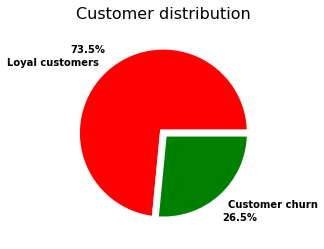

In [9]:
#dataset
df= df_gym.groupby('Churn')['Churn'].count()

#pie chart
names= 'Loyal customers', 'Customer churn'
plt.title('Customer distribution', size=16)
plt.pie(df, labels=names, colors=['red','green'], 
        pctdistance=1.3, autopct='%1.1f%%', textprops=dict(weight="bold"),
        wedgeprops = {'linewidth': 7, 'edgecolor':'white'});

Here 26.5% of customers are churn rate.

In [10]:
def make_plot(df, color1, color2, kind):
    #the function draws graphs according to the specified parameters
    print('Distribution of values')
    print('Legend:', color1,'color - Active customers,', color2,'color - Customer churn')
    plt.figure(figsize=(12,3))
    r=1
    #three graphics side by side
    for col in df.columns:
        plt.subplot(1,3,r)
        if kind=='kde': #dencity plot
            ax1= sns.kdeplot(df_gym[df_gym['Churn']==0][col], shade=True, color=color1, legend=False
                            ).set_title(col)
            ax2= sns.kdeplot(df_gym[df_gym['Churn']==1][col], shade=True, color=color2, legend=False);
        else:
            ax1= df_gym[df_gym['Churn']==0][col].hist(color=color1, alpha=.5, grid=False).set_title(col)
            ax2= df_gym[df_gym['Churn']==1][col].hist(color=color2, alpha=.6, grid=False);
        r+=1

Consider the graphs of data distribution with division by churn label.

Distribution of values
Legend: red color - Active customers, green color - Customer churn


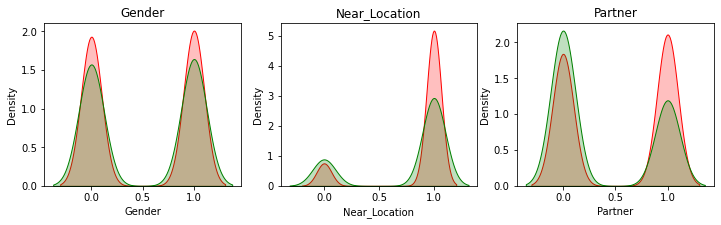

In [11]:
#data distribution graphs divided by churn mark
make_plot(df_gym[['Gender','Near_Location','Partner']],'red','green','kde')

- The graph shows the proportional distribution by gender between active customers and churn customers.
- The number of clients who have gym is nearby is higher and their loyalty is also higher.
- If a customer is an employee of a partner company, then his/her loyalty is much higher.

Distribution of values
Legend: orange color - Active customers, green color - Customer churn


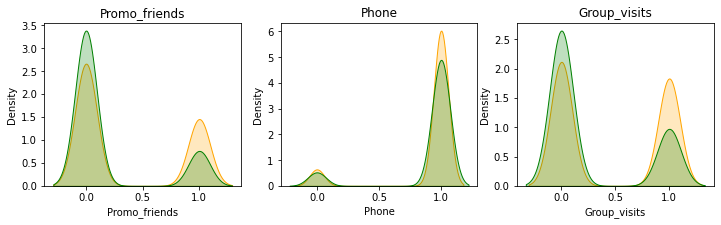

In [12]:
#data distribution graphs divided by churn mark
make_plot(df_gym[['Promo_friends','Phone','Group_visits']],'orange','green','kde')

- The number of customers who came by the "bring a friend" invitation is small, but the loyalty of such customers is still higher than that of regular customers.
- The graph also shows that most customers provide their phone number as personal data, but this does not significantly affect customer churn.
- There are slightly fewer clients participating in group classes than those training on their own, but their loyalty is much higher.

Distribution of values
Legend: red color - Active customers, green color - Customer churn


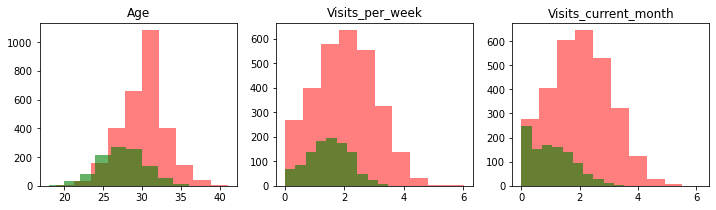

In [13]:
#data distribution histogram divided by churn mark
make_plot(df_gym[['Age','Visits_per_week','Visits_current_month']],'red','green', 'hist')

- The graph shows that the average age of regular customers is from 25 to 35 years old. At the same time, the average age of churn clients is from 24 to 30 years.
- Average frequency of visits over the customer's lifetime is mostly 2-3 times in a week. Clients who get into the outflow visit the gym on average 1-2 times.
- Similar data on the average frequency of visits per week compared to the previous month.

Distribution of values
Legend: blue color - Active customers, green color - Customer churn


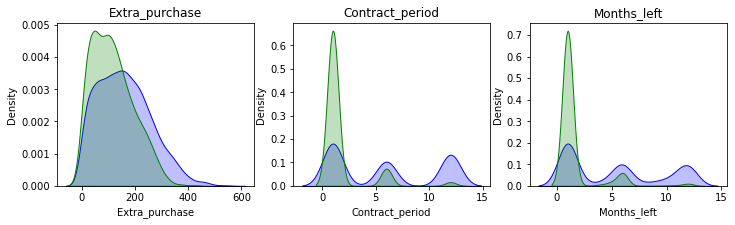

In [14]:
#data distribution graphs divided by churn mark
make_plot(df_gym[['Extra_purchase','Contract_period','Months_left']],'blue','green', 'kde')

- On the graph with the data on the additional costs of clients in the gym, it is noticeable that the customers who are in the churn spend significantly more money.
- Visiting contracts are for 1 month, 6 months and 1 year. For active customers, contracts are distributed almost evenly, with a slight deviation towards contracts for 1 month. At the same time, the largest customer churn occurs for 1-month contracts and the smallest for 12-month contracts.
- The histogram months before the end of the contract has almost the same distribution.

Last, consider the distribution of Lifetime values

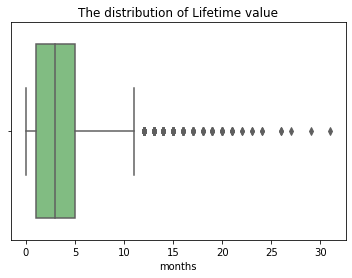

In [15]:
#boxplot of lifetime values
sns.boxplot(x=df_gym['Lifetime'], palette="YlGn").set(title="The distribution of Lifetime value"
                                                      , xlabel='months');

The values in the Lifetime field have a large number of outliers. Let's see how many there are and decide how to deal with them.

In [16]:
#check profiles with lifetime more than 12 months
outliers= df_gym.loc[(df_gym['Lifetime']>12),'Lifetime'].count()
print('Count of outliers:', outliers)
print('Percentage of outliers: {:.0%}'.format(outliers/df_gym.shape[0]))

Count of outliers: 139
Percentage of outliers: 3%


The percentage of outliers is small, we can remove them. However, the dataset contains only 4000 records. For more accuracy of the forecast, we will leave the existing profiles, but replace the differing values with 12, which corresponds to the annual contract of the gym.

In [17]:
#replace outliers with a new value
df_gym.loc[(df_gym['Lifetime']>12),'Lifetime']=12

Let's look at the distribution of data after replacement.

In [18]:
#descriptive statistics
df_gym['Lifetime'].describe()

count    4000.00000
mean        3.57475
std         3.23667
min         0.00000
25%         1.00000
50%         3.00000
75%         5.00000
max        12.00000
Name: Lifetime, dtype: float64

This transformation does not change the basic meaning of the value of this field and and its distribution parameters.

Now let's look at the average values of all features in the two groups.

In [19]:
#Churn=0 - Active customers, Churn=1 - Customer churn
df_mean= df_gym.groupby('Churn').mean()
df_mean.T

Churn,0,1
Gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Extra_purchase,158.445715,115.082899
Months_left,5.283089,1.662582


Average values of Gender and Phone are almost the same in groups. Groups differ significantly in terms of Age and Extra_purchase characteristics.<br>
We visualize the groups by other parameters.

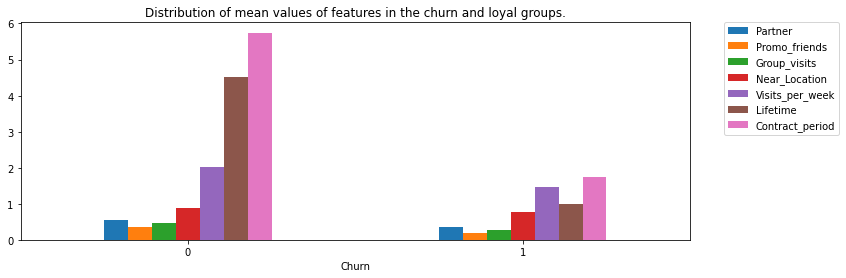

In [20]:
df_mean.loc[:,['Partner', 'Promo_friends', 'Group_visits', 'Near_Location',
               'Visits_per_week', 'Lifetime','Contract_period']]\
       .plot.bar(figsize=(12, 4), rot=1)\
       .set_title('Distribution of mean values of features in the churn and loyal groups.');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

As we can see, the distribution of the mean values of the parameters in both groups is similar, except for the Lifetime value. It is higher in the group of loyal customers, which corresponds to its meaning.

Let's build a correlation matrix.

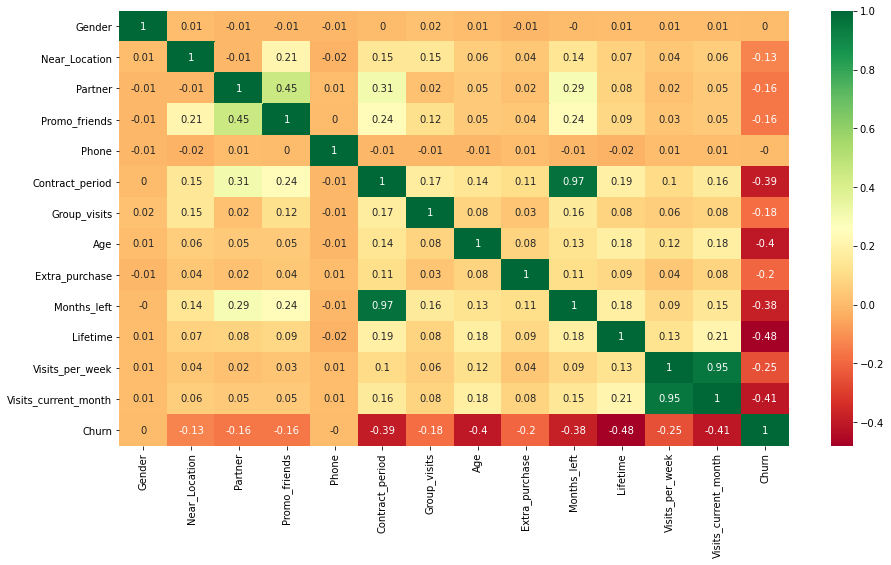

In [21]:
plt.figure(figsize=(15,8))
corr = df_gym.corr().round(2)
sns.heatmap(corr, annot=True, cmap='RdYlGn');

As we can see, Churn value has weak correlation with all other features. The weakest correlation is between Lifetime and Churn values.

Also, there is a very strong correlation between the *Months_left* and *Contract_period, Visits_current_month* and *Visits_per_week* value pairs (>0.9). The mutual correlation is undesirable with linear models, so we will remove the twin field from the dataset.

In [22]:
#drop two fields
df_gym= df_gym.drop(['Months_left','Visits_current_month'], axis = 1)

## Conclusion.<a class="anchor" id="Conclusion_Part_2"></a>

Summing up, we can define a portrait of a client who remains loyal to the gym for a long time.<br>
A loyal customer is
- a client whose age is 25 and older
- who lives or works near the gym
- an employee of the partner company or who came by invitation "bring a friend"
- participating in group classes
- visits the gym 2-3 times a week
- makes a few additional purchases
- and has a one-year contract with a gym.

The churn client is
- one who belongs to the age group from 18 to 35
- who came to the gym independently or on occasion
- practicing independently
- visits the gym 1-2 times a week
- makes many additional purchases
- and has a contract with a gym for 1 month.

## Part 3. Model Implementation <a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

One of the typical tasks arising in the process of defining customer behavior is determining whether a customer belongs to one of two classes: loyal to the company and inclined to quit (a binary classification problem). With the help of methods of machine learning, this task can be effectively solved.

In this section, we will create a model for predicting user churn.

Let's divide the data into train and validation sets. <br>
*Churn* is a target variable.<br>
Common split percentages include 80% of train data and 20% of test data.

In [23]:
#dividing data into features (the X matrix) and a target variable (y)
X = df_gym.drop('Churn', axis = 1)
y = df_gym['Churn']
 
#splitting data into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Many ML algorithms perform better on standardized data, where feature values correspond to the standard normal distribution.

In [24]:
#StandardScaler object
scaler = StandardScaler()
#training the scaler and transforming the matrix for the train set
X_train_st = scaler.fit_transform(X_train)

#standardization of the feature matrix for the test set
X_test_st = scaler.transform(X_test)

We will train the model using two methods: Logistic regression and Random forest

In [25]:
#list of models
models = [LogisticRegression(random_state=0, solver='lbfgs'), 
          RandomForestClassifier(random_state=0, n_estimators=100)]

Evaluating accuracy, precision, and recall for both models using the validation data.<br>
Machine learning model _accuracy_ is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input or training data.<br>
_Precision_ tells us what share of predictions in class 1 are true. In other words, we look at the share of correct answers only in the target class.<br>
_Recall_ is the fraction of the total amount of relevant instances that were actually retrieved.

In [26]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    #function calculates metrics for a given model
    m.fit(X_train, y_train)
    #to make forecasts
    predictions = m.predict(X_test)
 
    # print the studied metrics for the resulting prediction
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions) ))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
    print()
    return

# print all the studied metrics 
for i in models:
    # define the model's algorithm 
    print(i)
    model = i
    make_prediction(model, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
Accuracy: 0.91
Precision: 0.83
Recall: 0.83

RandomForestClassifier(random_state=0)
Accuracy: 0.89
Precision: 0.81
Recall: 0.79



As we can see, the LogisticRegression method gives the best metric results.

Let's take a look at the importance of features.

In [27]:
#train the final model
final_model = LogisticRegression(random_state=0, solver='lbfgs')
make_prediction(final_model, X_train_st, y_train, X_test_st, y_test)

Accuracy: 0.91
Precision: 0.83
Recall: 0.83



            feature  importances
9          Lifetime    -3.162804
5   Contract_period    -1.362020
7               Age    -1.151696
10  Visits_per_week    -0.699965
8    Extra_purchase    -0.547876
6      Group_visits    -0.360342
3     Promo_friends    -0.163965
4             Phone    -0.112460
1     Near_Location    -0.073359
2           Partner    -0.041944
0            Gender     0.029002


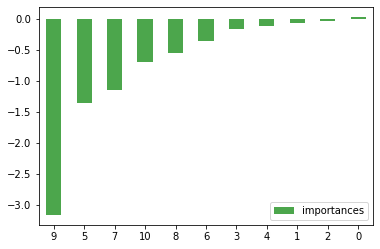

In [28]:
#DataFrame with feature names and importance
features = pd.DataFrame({'feature': X_train.columns, 
                         'importances': final_model.coef_[0]}).sort_values(by='importances', ascending=True) 
 
#show the DataFrame with features
print(features)
features.plot(kind='bar', color='green', alpha=.7, rot=1);

These coefficients provide the basis for a crude feature importance score.

Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

## Conclusion <a class="anchor" id="Conclusion_Part_3"></a>

The result obtained correlates with the conclusions that were made at the previous stage. This means that our model works well and can be used to prevent customer churn.

The scores suggest that the model found the three important features:
- Lifetime
- Contract_period
- Age 

## Part 4. Creating user clusters <a class="anchor" id="Part_4"></a>
[Go back to the Contents](#contents)

Let's put off the column with churn data and define clusters of customers.

For the clustering algorithm, data standardization is mandatory.

In [29]:
#standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

We can now build a matrix of distances based on the standardized feature matrix.

In [30]:
#matrix
linked = linkage(X_sc, method = 'ward')

The result is visualized using a dendrogram plot.

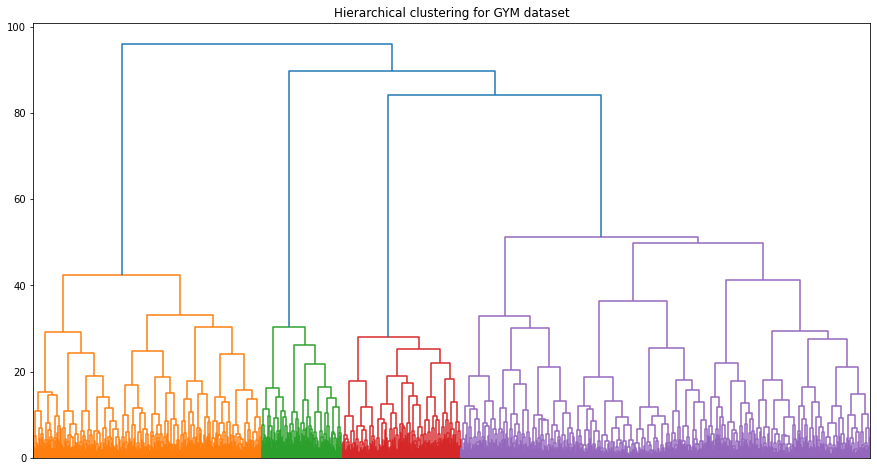

In [31]:
#plotting dendrogram
plt.figure(figsize=(15, 8))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical clustering for GYM dataset')
plt.show();

A dendrogram represents the relationships of similarity among a group of entities. More specifically, it tries to identify homogenous groups of cases if the grouping is not previously known.
In our dataset, the dendrogram identified 4 main groups. The 4th group is large, so let's take its constituents and further consider 5 clusters.

Let's train the clustering model with the K-means algorithm and predict customer clusters.

In [32]:
#setting the number of clusters as 5
km = KMeans(random_state=0, n_clusters = 5) 
#applying the algorithm to the data and forming a cluster vector
labels = km.fit_predict(X_sc)

#store cluster labels in the field of our dataset
df_gym['Clusters'] = labels

Now let's look at the statistics of the average values of the features in each cluster.

In [33]:
#the mean values per cluster
df_mean= df_gym.groupby('Clusters').mean()
df_mean.T

Clusters,0,1,2,3,4
Gender,0.523316,0.465812,0.555663,0.491935,0.522205
Near_Location,0.862694,0.600427,0.960310,0.964718,0.822358
Partner,0.471503,0.208333,0.000000,0.924395,1.000000
Promo_friends,0.305699,0.061966,0.063892,1.000000,0.000000
Phone,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4.777202,1.824786,4.006776,6.969758,6.309342
Group_visits,0.427461,0.169872,0.552759,0.510081,0.379786
Age,29.297927,26.872863,30.470474,29.473790,29.955590
Extra_purchase,144.208179,116.188803,165.270756,151.819976,156.244606
Lifetime,3.766839,1.565171,4.436592,4.090726,4.194487


And now we have several portraits of the average gym goer.<br>
The male gender in clusters still takes precedence. But now the average age of customers is between 28 and 31.<br>
The *Visits_per_week* feature now ranges from 1.5 to 2.3, which means that clusters better take into account the number of visits less and more than 2.

It should be noted that clients who live or work away from the gym are separated into a different cluster. Also those who did not provide their phone numbers.<br>
It can be said that those who came through the "bring a friend" promotion are allocated to a separate cluster too.

Let's look at the clusters on the graphs of the distribution of features in them.

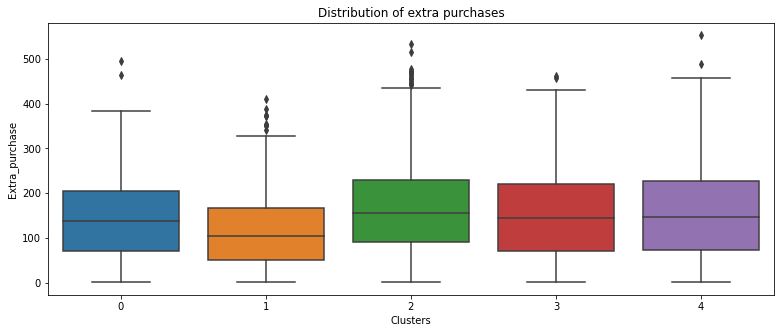

In [34]:
#plotting distributions Extra_purchase feature in clusters
plt.figure(figsize=(13,5))
ax = sns.boxplot(data=df_gym, x='Clusters', y='Extra_purchase'); # showfliers=False);
ax.set_title('Distribution of extra purchases');

The highest mean value is in cluster 0, the lowest is in cluster 1.
All graphs are distributed in the direction of increasing values, which is explained by the semantic meaning of the *Extra_purchase* feature. The median is shown in the center of the box.

Let's look at the distribution of the Age feature.

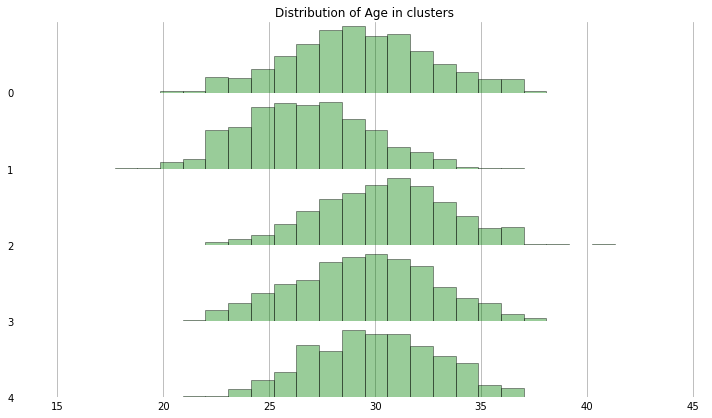

In [35]:
#distribution of age feature
ax= joypy.joyplot(df_gym[['Age','Clusters']], column=['Age'], by='Clusters',
                  hist="True", bins=30, color="green", alpha = 0.4,
                  grid=True, legend=False, overlap=0, ylim='own',
                  figsize=(10,6), title= "Distribution of Age in clusters"); 

As we can see, cluster 1 contains, on average, the youngest clients, cluster 0 contains on average older clients.

Visualization of other features by clusters:

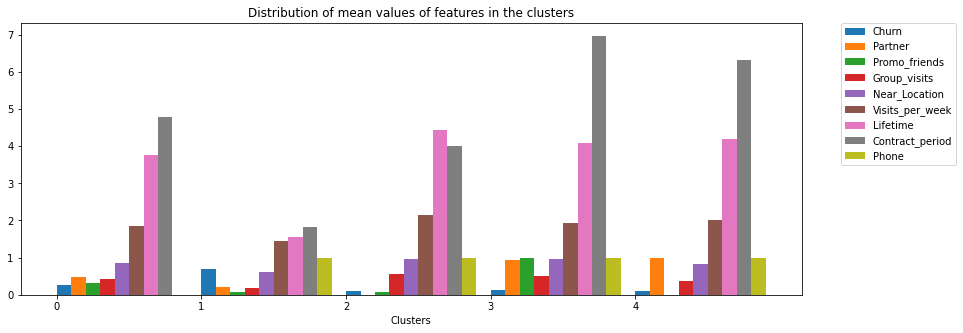

In [36]:
df_mean.loc[:,['Churn', 'Partner', 'Promo_friends', 'Group_visits', 'Near_Location',
               'Visits_per_week', 'Lifetime','Contract_period', 'Phone']]\
       .plot.bar(figsize=(14, 5), rot=1, width=0.9, align='edge')\
       .set_title('Distribution of mean values of features in the clusters');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

As we can see in the graph, the highest churn rate was found in clusters 1 and 4.<br>
The smallest number of churn clients is allocated to cluster 0.

Let's calculate the percentage of customer churn in clusters.

In [37]:
#group by clusters
df= df_gym.groupby('Clusters').agg({'Churn':['count','sum']})
#rename columns
df.columns=['Number of customers','Number of customers churn']
#ratio
df['Customer churn rate']= (df['Number of customers churn']/df['Number of customers']*100).round(2)
df.sort_values(by='Customer churn rate', ascending=False)

,Number of customers,Number of customers churn,Customer churn rate
Clusters,,,
1,936,644,68.80
0,386,103,26.68
3,992,130,13.10
4,653,72,11.03
2,1033,112,10.84


Clients with profile characteristics from clusters 1 and 4 are more likely to quit training. The most loyal customers are those with profile characteristics from the cluster 0.

## Conclusion<a class="anchor" id="Conclusion_Part_4"></a>

At this step, the dataset was divided into 5 clusters, each of which has its own characteristics in the distribution of feature values.

Clusters 0 and 2 include customers whose profile parameters correspond to the highest level of loyalty.
Cluster 0 is characterized by the lowest number of refer-a-friend clients, long contract duration, large number of clients visiting groups, highest average age of clients, highest number of extra purchases made at the gym and highest number of visits per week.<br>
The same clients are allocated to cluster 2, but with an affiliate program and a refer a friend program.

Cluster 3 includes all clients who did not provide a telephone. The indicators for this cluster are average, so the Phone feature should not be taken into account.

Clusters 1 and 4 include customers whose profile parameters correspond to the lowest loyalty level.<br>
Cluster 4 is characterized by the fact that it includes almost all clients living and working away from the gym.<br>
In Cluster 1, we see the youngest customers, customers who make the least amount of purchases, visit the gym less than 2 times a week on average, and have short contracts.

In general, it can be said that *Contract_period, Partner, Promo_friends, Near_Location, Visits_per_week* features are most important for customer retention.

## General conclusion.<a class="anchor" id="General_conclusion"></a>
[Go back to the Contents](#contents)

We have analyzed the data provided by the Model Fitness gym network. The data contains customer profiles with different characteristics.<br>
The analysis showed 26.5% of clients stopped working out in the gym. We need to define a customer retention strategy.

The first important characteristic that the analysis showed is the length of the gym contract with the client. A client who has entered into a contract for 12 months often remains loyal to the end. This parameter shows itself well in conjunction with affiliate programs. Hence, loyalty programs for such customers can increase their retention.

In turn, affiliate programs and refer-a-friend programs showed a correlation with proximity to the client's place of residence or work. In this case, personalized service can be a good marketing ploy. Such clients more often come to train in groups, which means that their additional interest in this type of training will be useful.

These marketing tactics make sense to retain those who are likely to stay. To keep a more mobile group of clients, gym network should pay attention to such characteristics of the client as age, number of gym visits per week.<br>
Marketing moves aimed at people from 18 to 25 years old and allowing to gather them in group classes, to involve in programs such as refer a friend, will help keep them. In the future, the gym may offer them a longer contract, which will cement their loyalty.